In [3]:
#Nicole Zawadzki
#ASTR400b Project
#April 10th
#Plot the density profile for M33
#No more test, this is the real deal

In [4]:
#import modules
import numpy as np
import astropy.units as u

#import plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [5]:
#import relevant files
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassDistribution import MassProfile

In [50]:
#function that find the density of M33 at a radius
def DensityProfile(galaxy, snap, R):
    #input: galaxy name, snapshot, and raduis array 
    #return: array of densities at each r in inupt array
    
    #reconstruct file
    #add string of the filenumber to find value "000"
    ilbl = '000' + str(snap)
    #remove all but the last 3 digits
    ilbl = ilbl[-3:]
    filename = "%s_"%(galaxy) + ilbl + '.txt'

    #read in data from ReadFile
    time, total, data = Read(filename)
    
    #index for disk particles
    ptype = np.where(data['type'] == 2)
    
    #store position and mass from ReadFile for disk particles
    x = data['x'][ptype]
    y = data['y'][ptype]
    z = data['z'][ptype]
    m = data['m'][ptype]*1e10/1e12
    
    #create Center of Mass object for disk particles
    COM = CenterOfMass(filename,2)
    COMP = COM.COM_P(1.0,4.0)
    
    #mass profile object
    Profile = MassProfile(galaxy,snap)
    DiskMass = Profile.MassEnclosed(2,R)
    
    #find position relative to COM
    x2 = x - COMP[0]
    y2 = y - COMP[1]
    z2 = z - COMP[2]
    r = np.sqrt(x2**2 + y2**2 + z2**2)
    print len(r)
    print r
    #define density array
    density = np.zeros(shape=len(R))
    
    #loop over radius array to find density at certain radius
    for radius in range(len(R)):
        #finding the volume at radius
        vol = (4.0/3.0)*np.pi*R[radius]**3
        #find and store particle masses within given radius
        #index = np.where(r<R[radius])
        #print R[radius]
        #print len(index)
        density[radius] = MDiskMass[radius]/vol
        
    return density 
      

In [53]:
R = np.linspace(0.01,15,50)
M33density = DensityProfile('M31', 0, R)

120000
[  8.65183812   0.63466375   3.0582099  ...,   1.10210305  34.92964558
  11.29399265]


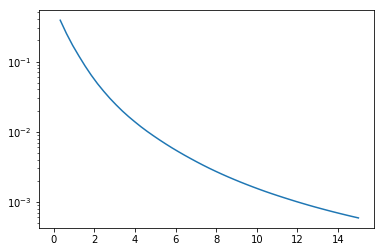

In [54]:
fig = plt.figure()
ax = plt.subplot(111)
plt.semilogy(R,M33density)